In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style ='whitegrid')
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('cc_approvals.data')

In [3]:
df

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [6]:
file = open('Columns.txt')
text = file.read()

In [18]:
columns = text.split('\n')
columns

['Gender',
 'Age',
 'Debt\t',
 'Married\t',
 'BankCustomer\t',
 'EducationLevel\t',
 'Ethnicity\t',
 'YearsEmployed\t',
 'PriorDefault\t',
 'Employed\t',
 'CreditScore\t',
 'DriversLicense\t',
 'Citizen\t',
 'ZipCode\t',
 'Income\t',
 'Approved',
 '']

In [22]:
columns = [str(col).strip('\t')for col in columns]

In [23]:
columns = columns[:-1]
columns

['Gender',
 'Age',
 'Debt',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'YearsEmployed',
 'PriorDefault',
 'Employed',
 'CreditScore',
 'DriversLicense',
 'Citizen',
 'ZipCode',
 'Income',
 'Approved']

In [24]:
df.columns = columns

In [25]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [27]:
df.shape

(689, 16)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    object 
 1   Age             689 non-null    object 
 2   Debt            689 non-null    float64
 3   Married         689 non-null    object 
 4   BankCustomer    689 non-null    object 
 5   EducationLevel  689 non-null    object 
 6   Ethnicity       689 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         689 non-null    object 
 14  Income          689 non-null    int64  
 15  Approved        689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Debt,689.0,4.765631,4.978470,0.0,1.000,2.75,7.250,28.0
YearsEmployed,689.0,2.224819,3.348739,0.0,0.165,1.00,2.625,28.5
CreditScore,689.0,2.402032,4.866180,0.0,0.000,0.00,3.000,67.0
Income,689.0,1018.862119,5213.743149,0.0,0.000,5.00,396.000,100000.0


# Data Cleaning

In [30]:
df.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [33]:
for n , i in enumerate (df['Age'].tolist()):
    if ('?') in i :
        print (n)

82
85
91
96
253
285
328
444
449
499
514
607


In [37]:
df.iloc[82,:]


Gender                a
Age                   ?
Debt                3.5
Married               u
BankCustomer          g
EducationLevel        d
Ethnicity             v
YearsEmployed       3.0
PriorDefault          t
Employed              f
CreditScore           0
DriversLicense        t
Citizen               g
ZipCode           00300
Income                0
Approved              -
Name: 82, dtype: object

In [ ]:
WrongValueColumns = []
for col in data.columns : 
    if data[col].tolist().count('?') > 0 : 
        print(f" at Column {col} # of ? is {data[col].tolist().count('?')}")        
        WrongValueColumns.append(col)

In [39]:
wrongvaluecolumns = [] 
for col in df.columns : 
    if df[col].tolist().count('?') > 0 : 
        print (f'at columns {col} number of ? value is {df[col].tolist().count("?")}')
        wrongvaluecolumns.append(col)

at columns Gender number of ? value is 12
at columns Age number of ? value is 12
at columns Married number of ? value is 6
at columns BankCustomer number of ? value is 6
at columns EducationLevel number of ? value is 9
at columns Ethnicity number of ? value is 9
at columns ZipCode number of ? value is 13


In [40]:
wrongvaluecolumns

['Gender',
 'Age',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'ZipCode']

In [42]:
df.shape

(689, 16)

In [43]:
for col in wrongvaluecolumns : 
    df.drop(df[df[col] == '?'].index , axis = 0 , inplace = True)
    df.reset_index(inplace = True)
    df.drop('index' , axis = 1 , inplace = True)

In [44]:
df.shape

(652, 16)

In [45]:
df['Age'] = df['Age'].astype(float)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          652 non-null    object 
 1   Age             652 non-null    float64
 2   Debt            652 non-null    float64
 3   Married         652 non-null    object 
 4   BankCustomer    652 non-null    object 
 5   EducationLevel  652 non-null    object 
 6   Ethnicity       652 non-null    object 
 7   YearsEmployed   652 non-null    float64
 8   PriorDefault    652 non-null    object 
 9   Employed        652 non-null    object 
 10  CreditScore     652 non-null    int64  
 11  DriversLicense  652 non-null    object 
 12  Citizen         652 non-null    object 
 13  ZipCode         652 non-null    object 
 14  Income          652 non-null    int64  
 15  Approved        652 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 81.6+ KB


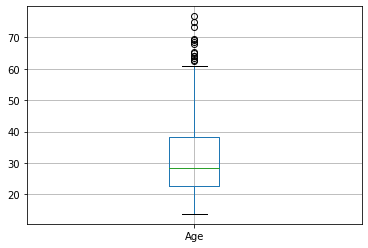

In [47]:
df.boxplot('Age')

In [50]:
df.duplicated().sum()

0

In [55]:
NewDf = df.iloc[list(np.random.randint(600 , size = 30)) , : ]

In [56]:
NewDf

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
175,a,21.25,2.335,u,g,i,bb,0.500,t,t,4,f,s,00080,0,+
159,a,40.83,10.000,u,g,q,h,1.750,t,f,0,f,g,00029,837,+
151,a,68.67,15.000,u,g,e,z,0.000,t,t,14,f,g,00000,3376,+
81,b,27.25,0.625,u,g,aa,v,0.455,t,f,0,t,g,00200,0,-
260,b,18.08,6.750,y,p,m,v,0.040,f,f,0,f,g,00140,0,-
411,b,22.92,3.165,y,p,c,v,0.165,f,f,0,f,g,00160,1058,-
393,b,40.58,1.500,u,g,i,bb,0.000,f,f,0,f,s,00300,0,-
148,b,32.75,1.500,u,g,cc,h,5.500,t,t,3,t,g,00000,0,+
358,b,20.67,0.835,y,p,c,v,2.000,f,f,0,t,s,00240,0,-
332,a,26.17,2.000,u,g,j,j,0.000,f,f,0,t,g,00276,1,-


In [57]:
NewDf.shape

(30, 16)

In [59]:
df.shape

(652, 16)

In [60]:
df = pd.concat([df ,NewDf] , axis = 0 )

In [61]:
df.shape

(682, 16)

In [62]:
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,b,33.17,3.040,y,p,c,h,2.040,t,t,1,t,g,00180,18027,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
447,b,21.08,4.125,y,p,i,h,0.040,f,f,0,f,g,00140,100,-
450,b,20.67,0.415,u,g,c,v,0.125,f,f,0,f,g,00000,44,-


In [65]:
df = df.sample(frac = 1)

In [66]:
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
644,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-
336,b,36.67,2.000,u,g,i,v,0.250,f,f,0,t,g,00221,0,-
365,b,22.08,11.460,u,g,k,v,1.585,f,f,0,t,g,00100,1212,-
94,b,37.50,1.750,y,p,c,bb,0.250,t,f,0,t,g,00164,400,-
576,b,20.00,1.250,y,p,k,v,0.125,f,f,0,f,g,00140,4,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,b,34.83,2.500,y,p,w,v,3.000,f,f,0,f,s,00200,0,-
72,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,00160,2,-
203,b,24.33,6.625,y,p,d,v,5.500,t,f,0,t,s,00100,0,+
325,b,26.92,2.250,u,g,i,bb,0.500,f,f,0,t,g,00640,4000,-


In [67]:
df.reset_index(inplace = True)
df.drop('index' , axis = 1 , inplace = True)
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-
1,b,36.67,2.000,u,g,i,v,0.250,f,f,0,t,g,00221,0,-
2,b,22.08,11.460,u,g,k,v,1.585,f,f,0,t,g,00100,1212,-
3,b,37.50,1.750,y,p,c,bb,0.250,t,f,0,t,g,00164,400,-
4,b,20.00,1.250,y,p,k,v,0.125,f,f,0,f,g,00140,4,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,b,34.83,2.500,y,p,w,v,3.000,f,f,0,f,s,00200,0,-
678,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,00160,2,-
679,b,24.33,6.625,y,p,d,v,5.500,t,f,0,t,s,00100,0,+
680,b,26.92,2.250,u,g,i,bb,0.500,f,f,0,t,g,00640,4000,-


In [68]:
df.shape

(682, 16)

In [70]:
df.duplicated().sum()

30

In [78]:
df.drop_duplicates(inplace = True)

In [79]:
df.shape

(652, 16)

In [80]:
df.reset_index(inplace = True)
df.drop('index' , axis = 1 , inplace = True)
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-
1,b,36.67,2.000,u,g,i,v,0.250,f,f,0,t,g,00221,0,-
2,b,22.08,11.460,u,g,k,v,1.585,f,f,0,t,g,00100,1212,-
3,b,37.50,1.750,y,p,c,bb,0.250,t,f,0,t,g,00164,400,-
4,b,20.00,1.250,y,p,k,v,0.125,f,f,0,f,g,00140,4,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,b,34.83,2.500,y,p,w,v,3.000,f,f,0,f,s,00200,0,-
648,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,00160,2,-
649,b,24.33,6.625,y,p,d,v,5.500,t,f,0,t,s,00100,0,+
650,b,26.92,2.250,u,g,i,bb,0.500,f,f,0,t,g,00640,4000,-


In [83]:
df['Gender'].unique()

array(['b', 'a'], dtype=object)

In [85]:
df['Age'].min(),df['Age'].max()

(13.75, 76.75)

In [88]:
def Level(x,Values,Names) : #[18,22,40,81] , [Teen,YoungMan,Adult,Old]
    x = float(x)
    for a,b in zip(Values,Names) : 
        if x < a : return b
        
df['AgeLevel'] = df['Age'].apply(lambda x : Level(x , [18,22,40,81] , ['Teen','YoungMan','Adult','Old']))

df['AgeLevel'].value_counts()

Adult       373
Old         137
YoungMan    107
Teen         35
Name: AgeLevel, dtype: int64

In [89]:
df['DebtLevel']  = df['Debt'].apply(lambda x : Level(x,[5,15,30] , ['Poor Debt','Medium Debt','Good Debt']))
df['DebtLevel'].value_counts()         

Poor Debt      416
Medium Debt    207
Good Debt       29
Name: DebtLevel, dtype: int64

In [90]:
df['YearsEmployedLevel']  = df['YearsEmployed'].apply(
    lambda x : Level(x,[1,5,30],['Low Experience','Medium Experience','Good Experience']))
df['YearsEmployedLevel'].value_counts()       

Low Experience       308
Medium Experience    247
Good Experience       97
Name: YearsEmployedLevel, dtype: int64

In [91]:
df['CreditScoreLevel']  = df['CreditScore'].apply(lambda x : Level(x,[3,7,df['CreditScore'].max()+1],
             ['Poor Credit','Medium Credit','Good Credit']))
df['CreditScoreLevel'].value_counts()     

Poor Credit      476
Good Credit       95
Medium Credit     81
Name: CreditScoreLevel, dtype: int64

In [92]:
df['IncomeLevel']  = df['Income'].apply(lambda x : Level(x,[300,1000,100001], 
                ['Poor Income','Medium Income','Good Income']))
df['IncomeLevel'].value_counts()        

Poor Income      464
Good Income      107
Medium Income     81
Name: IncomeLevel, dtype: int64

In [93]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,AgeLevel,DebtLevel,YearsEmployedLevel,CreditScoreLevel,IncomeLevel
0,b,17.08,3.29,u,g,i,v,0.335,f,f,0,t,g,00140,2,-,Teen,Poor Debt,Low Experience,Poor Credit,Poor Income
1,b,36.67,2.00,u,g,i,v,0.250,f,f,0,t,g,00221,0,-,Adult,Poor Debt,Low Experience,Poor Credit,Poor Income
2,b,22.08,11.46,u,g,k,v,1.585,f,f,0,t,g,00100,1212,-,Adult,Medium Debt,Medium Experience,Poor Credit,Good Income
3,b,37.50,1.75,y,p,c,bb,0.250,t,f,0,t,g,00164,400,-,Adult,Poor Debt,Low Experience,Poor Credit,Medium Income
4,b,20.00,1.25,y,p,k,v,0.125,f,f,0,f,g,00140,4,-,YoungMan,Poor Debt,Low Experience,Poor Credit,Poor Income


In [99]:
df['ZipCode'].unique()

array(['00140', '00221', '00100', '00164', '00000', '00154', '00523',
       '00060', '00160', '00080', '00560', '00216', '00280', '00141',
       '00120', '00176', '00200', '00220', '00400', '00381', '00520',
       '00440', '00292', '00320', '00240', '00132', '00356', '00110',
       '00045', '00231', '00232', '00420', '00300', '00680', '00180',
       '00434', '00260', '00108', '00711', '00393', '00550', '00454',
       '00075', '00092', '00150', '00049', '00096', '00170', '00040',
       '00272', '00350', '00380', '00228', '00375', '00128', '00333',
       '00500', '00460', '00455', '00021', '00062', '00470', '00230',
       '00020', '00224', '00360', '00311', '00052', '00043', '00340',
       '00208', '00144', '00174', '00329', '00129', '00088', '00050',
       '00312', '00099', '00195', '00399', '00443', '00136', '00383',
       '00093', '00368', '00029', '00480', '00396', '00252', '00145',
       '00086', '00515', '00276', '00028', '00487', '00204', '00056',
       '00371', '004

In [94]:
df['ZipCode'].min(),df['ZipCode'].max()

('00000', '02000')

In [118]:
zipset = set([str(i)[:3] for i in df['ZipCode'].unique()])
zipset

{'000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '020'}

In [119]:
Areas = {key : value for value , key  in zip([f'Area{i+1}' for i in range(len(zipset))],zipset)}


In [120]:
Areas

{'003': 'Area1',
 '002': 'Area2',
 '008': 'Area3',
 '009': 'Area4',
 '001': 'Area5',
 '007': 'Area6',
 '020': 'Area7',
 '005': 'Area8',
 '006': 'Area9',
 '000': 'Area10',
 '004': 'Area11'}

In [115]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,AgeLevel,DebtLevel,YearsEmployedLevel,CreditScoreLevel,IncomeLevel
0,b,17.08,3.29,u,g,i,v,0.335,f,f,0,t,g,00140,2,-,Teen,Poor Debt,Low Experience,Poor Credit,Poor Income
1,b,36.67,2.00,u,g,i,v,0.250,f,f,0,t,g,00221,0,-,Adult,Poor Debt,Low Experience,Poor Credit,Poor Income
2,b,22.08,11.46,u,g,k,v,1.585,f,f,0,t,g,00100,1212,-,Adult,Medium Debt,Medium Experience,Poor Credit,Good Income
3,b,37.50,1.75,y,p,c,bb,0.250,t,f,0,t,g,00164,400,-,Adult,Poor Debt,Low Experience,Poor Credit,Medium Income
4,b,20.00,1.25,y,p,k,v,0.125,f,f,0,f,g,00140,4,-,YoungMan,Poor Debt,Low Experience,Poor Credit,Poor Income


In [116]:
df['ZipArea'] = df['ZipCode'].apply(lambda x : Areas [str(x)[:3]])
df['ZipArea'].value_counts()

Area10    206
Area5     189
Area2     124
Area1      72
Area11     37
Area8      14
Area6       4
Area9       3
Area3       1
Area4       1
Area7       1
Name: ZipArea, dtype: int64

In [117]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,AgeLevel,DebtLevel,YearsEmployedLevel,CreditScoreLevel,IncomeLevel,ZipArea
0,b,17.08,3.29,u,g,i,v,0.335,f,f,0,t,g,00140,2,-,Teen,Poor Debt,Low Experience,Poor Credit,Poor Income,Area5
1,b,36.67,2.00,u,g,i,v,0.250,f,f,0,t,g,00221,0,-,Adult,Poor Debt,Low Experience,Poor Credit,Poor Income,Area2
2,b,22.08,11.46,u,g,k,v,1.585,f,f,0,t,g,00100,1212,-,Adult,Medium Debt,Medium Experience,Poor Credit,Good Income,Area5
3,b,37.50,1.75,y,p,c,bb,0.250,t,f,0,t,g,00164,400,-,Adult,Poor Debt,Low Experience,Poor Credit,Medium Income,Area5
4,b,20.00,1.25,y,p,k,v,0.125,f,f,0,f,g,00140,4,-,YoungMan,Poor Debt,Low Experience,Poor Credit,Poor Income,Area5


In [131]:
def CPlot(feature) : 
    global df
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(x=feature, df=df,facecolor=(0, 0, 0, 0),
                  linewidth=5,edgecolor=sns.color_palette("dark", 3))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

def KPlot(feature,Limit=0) : 
    global df
    fig, ax = plt.subplots(figsize=(10,6))
    if Limit == 0 : 
        sns.kdeplot(df[feature], shade=True)
    else : 
        Data = df[df[feature]<=Limit]
        sns.kdeplot(Data[feature], shade=True)

def BPlot(feature1,feature2 = None,hue = None) : 
    global df
    fig, ax = plt.subplots(figsize=(10,6))
    if feature2 ==  None and hue == None : 
        sns.boxplot(df[feature1],width=0.3,color='r')
    elif  feature2 !=  None and hue == None :
        sns.boxplot(x = df[feature1],y=df[feature2],width=0.3,color='r')
    elif  feature2 !=  None and hue != None :
        sns.boxplot(x = df[feature1],y=df[feature2],hue=df[hue],width=0.3,color='r')
        
def JPlot(feature1,feature2,Type = 'scatter') : 
    global df
    sns.jointplot(df=df, x=feature1, y=feature2, kind=Type)   
    
    
def Pie(feature,Limit=20) : 
    global df
    fig, ax = plt.subplots(figsize=(10,6))
    plt.pie(df[feature].value_counts()[:Limit],labels=list(
        df[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(df[feature].value_counts()[:Limit]))] )
    plt.show()     
    
def SelectedGenderPie(feature,Limit=10) : 
    global df
    fig, ax = plt.subplots(figsize=(15,4))
    
    plt.subplot(1,2,1)
    plt.title('Gender A')
    Data = df[df['Gender']=='a']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(
        Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )
  
    plt.subplot(1,2,2)
    plt.title('Gender B')
    Data = df[df['Gender']=='b']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(
        Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [
            0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )
    plt.show()        
    
def SelectedApprovedPie(feature,Limit=10) : 
    global df
    fig, ax = plt.subplots(figsize=(15,4))
    
    plt.subplot(1,2,1)
    plt.title('Approved')
    Data = df[df['Approved']=='+']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(
        Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )
  
    plt.subplot(1,2,2)
    plt.title('Not Approved')
    Data = df[df['Approved']=='-']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(
        Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )
    plt.show()        
    
def SelectedAgePie(feature,Limit=10) : 
    global df
    fig, ax = plt.subplots(figsize=(15,4))
    
    plt.subplot(1,4,1)
    plt.title('Teen')
    Data = df[df['AgeLevel']=='Teen']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(
        Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )
  
    plt.subplot(1,4,2)
    plt.title('YoungMan')
    Data = df[df['AgeLevel']=='YoungMan']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(
        Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )

    plt.subplot(1,4,3)
    plt.title('Adult')
    Data = df[df['AgeLevel']=='Adult']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )

    plt.subplot(1,4,4)
    plt.title('Old')
    Data = df[df['AgeLevel']=='Old']
    plt.pie(Data[feature].value_counts()[:Limit],labels=list(Data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(Data[feature].value_counts()[:Limit]))] )
    plt.show()  

In [132]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,AgeLevel,DebtLevel,YearsEmployedLevel,CreditScoreLevel,IncomeLevel,ZipArea
0,b,17.08,3.29,u,g,i,v,0.335,f,f,0,t,g,00140,2,-,Teen,Poor Debt,Low Experience,Poor Credit,Poor Income,Area5
1,b,36.67,2.00,u,g,i,v,0.250,f,f,0,t,g,00221,0,-,Adult,Poor Debt,Low Experience,Poor Credit,Poor Income,Area2
2,b,22.08,11.46,u,g,k,v,1.585,f,f,0,t,g,00100,1212,-,Adult,Medium Debt,Medium Experience,Poor Credit,Good Income,Area5
3,b,37.50,1.75,y,p,c,bb,0.250,t,f,0,t,g,00164,400,-,Adult,Poor Debt,Low Experience,Poor Credit,Medium Income,Area5
4,b,20.00,1.25,y,p,k,v,0.125,f,f,0,f,g,00140,4,-,YoungMan,Poor Debt,Low Experience,Poor Credit,Poor Income,Area5


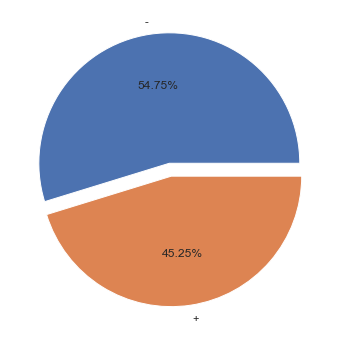

In [133]:
Pie('Approved')

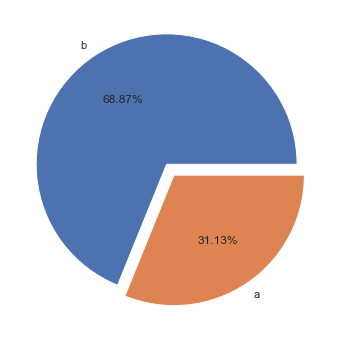

In [134]:
Pie('Gender')

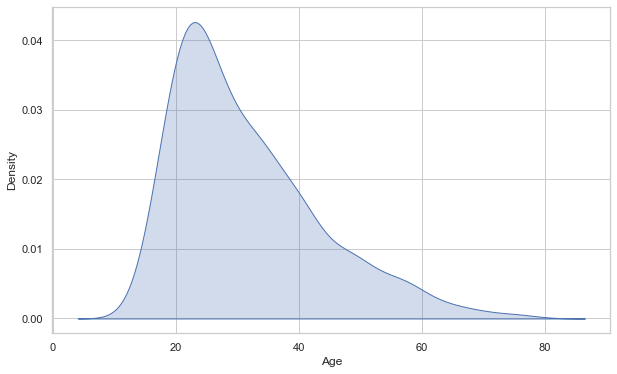

In [135]:
KPlot('Age')

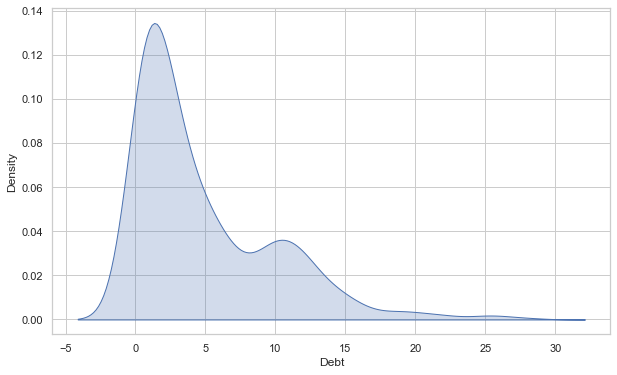

In [138]:
KPlot('Debt')

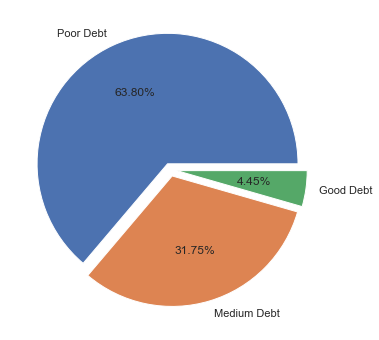

In [139]:
Pie('DebtLevel')

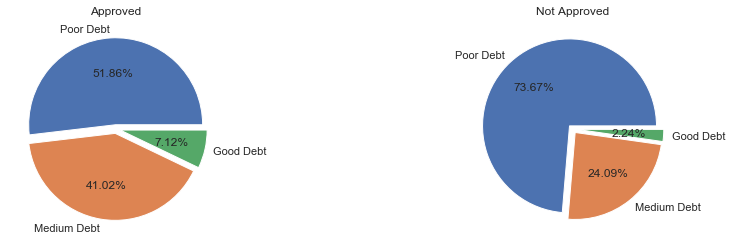

In [140]:
SelectedApprovedPie('DebtLevel')

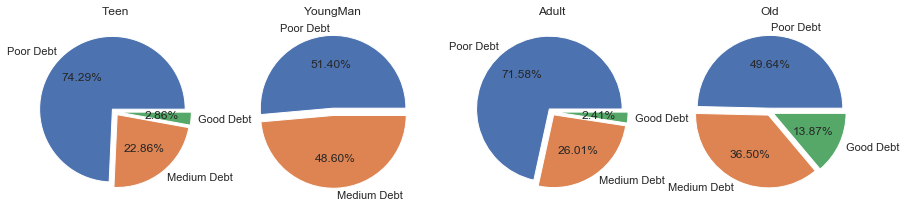

In [141]:
SelectedAgePie('DebtLevel')

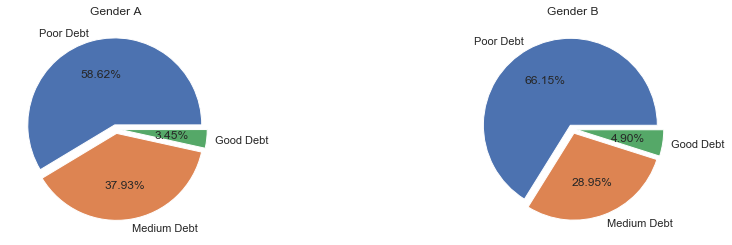

In [142]:
SelectedGenderPie('DebtLevel')

In [145]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,AgeLevel,DebtLevel,YearsEmployedLevel,CreditScoreLevel,IncomeLevel,ZipArea
0,b,17.08,3.29,u,g,i,v,0.335,f,f,0,t,g,00140,2,-,Teen,Poor Debt,Low Experience,Poor Credit,Poor Income,Area5
1,b,36.67,2.00,u,g,i,v,0.250,f,f,0,t,g,00221,0,-,Adult,Poor Debt,Low Experience,Poor Credit,Poor Income,Area2
2,b,22.08,11.46,u,g,k,v,1.585,f,f,0,t,g,00100,1212,-,Adult,Medium Debt,Medium Experience,Poor Credit,Good Income,Area5
3,b,37.50,1.75,y,p,c,bb,0.250,t,f,0,t,g,00164,400,-,Adult,Poor Debt,Low Experience,Poor Credit,Medium Income,Area5
4,b,20.00,1.25,y,p,k,v,0.125,f,f,0,f,g,00140,4,-,YoungMan,Poor Debt,Low Experience,Poor Credit,Poor Income,Area5


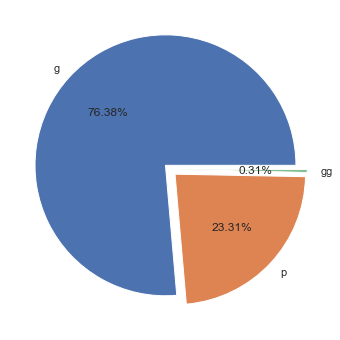

In [147]:
Pie('BankCustomer')

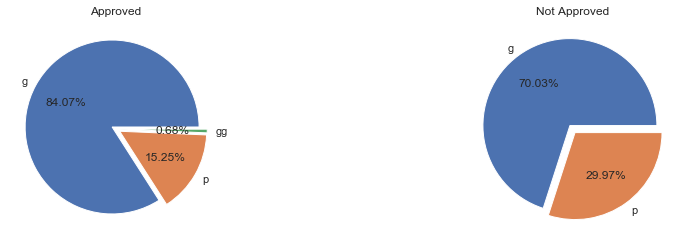

In [148]:
SelectedApprovedPie('BankCustomer')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


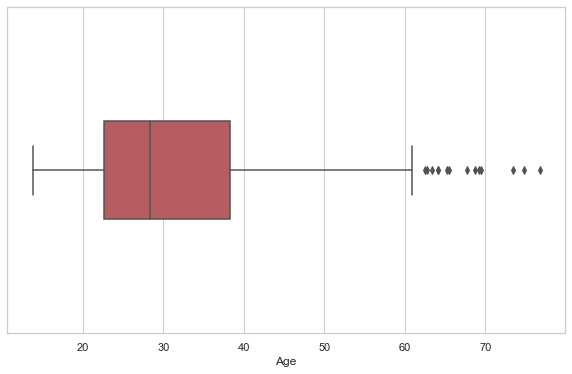

In [150]:
BPlot('Age')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


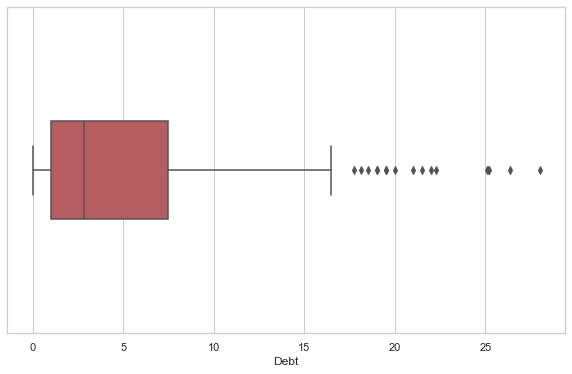

In [151]:
BPlot('Debt')

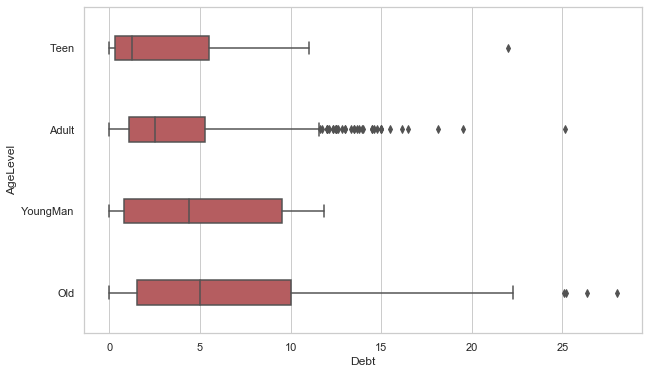

In [152]:
BPlot('Debt','AgeLevel')

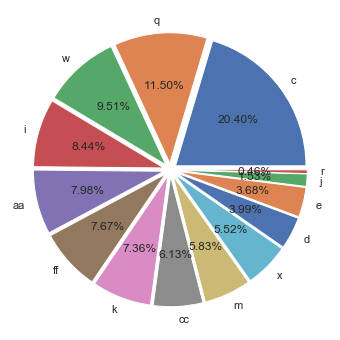

In [153]:
Pie('EducationLevel')

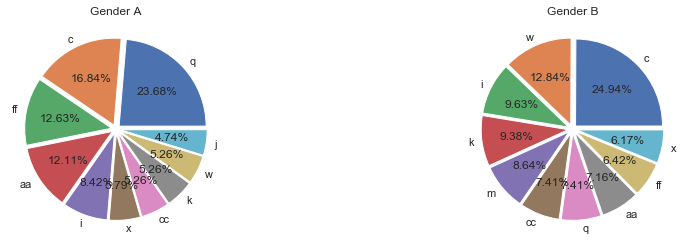

In [154]:
SelectedGenderPie('EducationLevel')

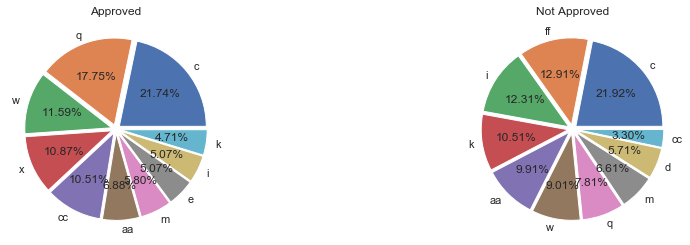

In [155]:
SelectedApprovedPie('EducationLevel')

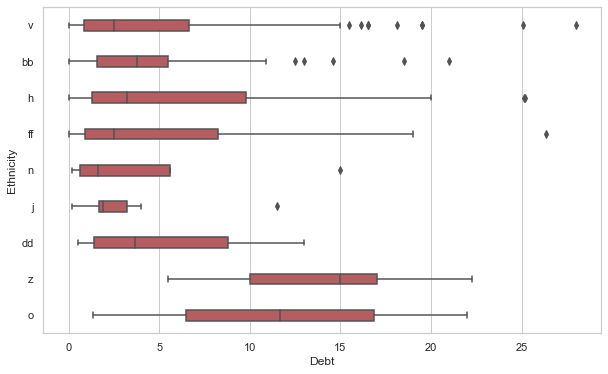

In [159]:
BPlot('Debt','Ethnicity')

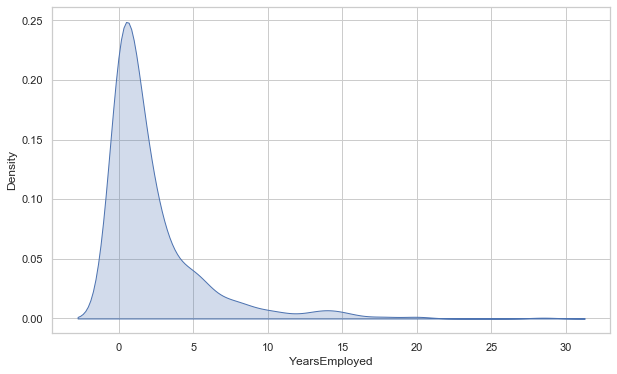

In [160]:
KPlot('YearsEmployed')

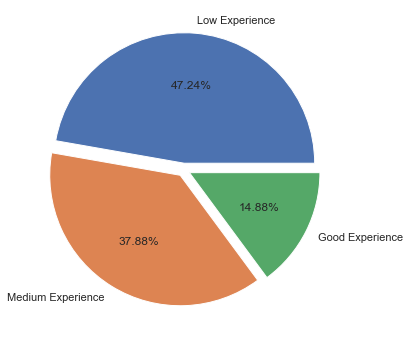

In [161]:
Pie('YearsEmployedLevel')

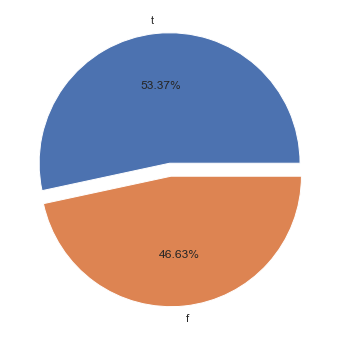

In [163]:
Pie('PriorDefault')

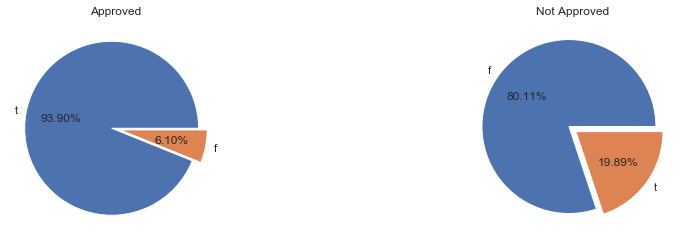

In [164]:
SelectedApprovedPie('PriorDefault')

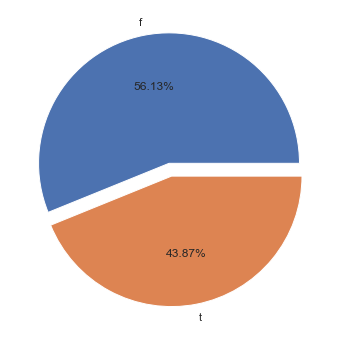

In [165]:
Pie('Employed')

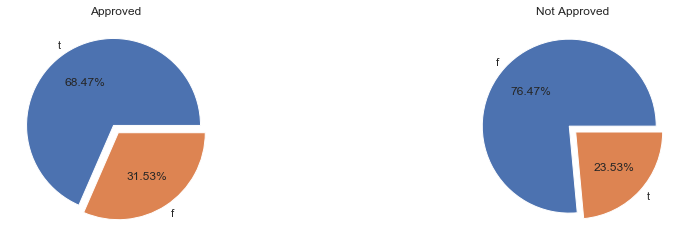

In [166]:
SelectedApprovedPie('Employed')

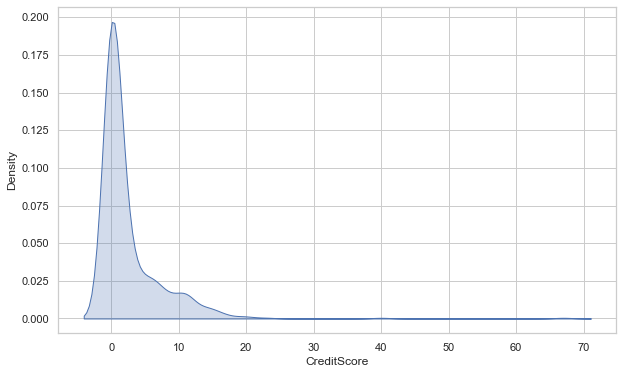

In [168]:
KPlot('CreditScore')

In [172]:
df.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,652.000000,652.000000,652.000000,652.000000,652.000000
mean,31.504847,4.836940,2.245821,2.504601,1015.315951
std,11.847327,5.027369,3.373483,4.971962,5257.161359
min,13.750000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,0.000000
50%,28.375000,2.855000,1.000000,0.000000,5.000000
75%,38.250000,7.500000,2.625000,3.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,100000.000000


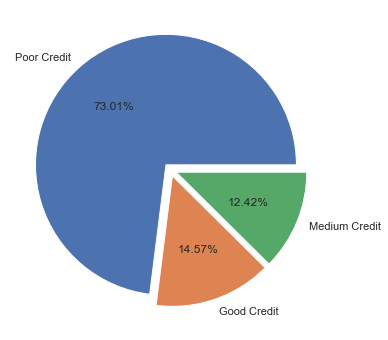

In [170]:
Pie('CreditScoreLevel')

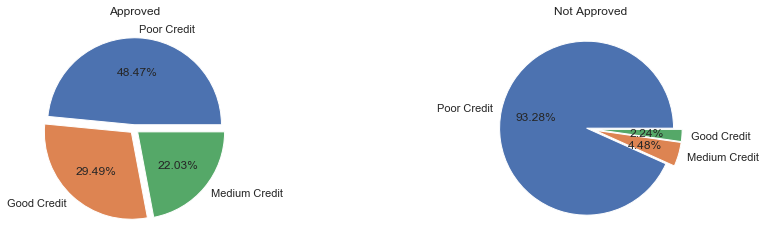

In [173]:
SelectedApprovedPie('CreditScoreLevel')

ValueError: Could not interpret value `CreditScore` for parameter `x`

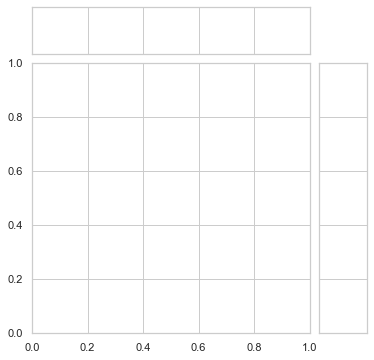

In [174]:
JPlot('CreditScore','Debt')

ValueError: Could not interpret value `Age` for parameter `x`

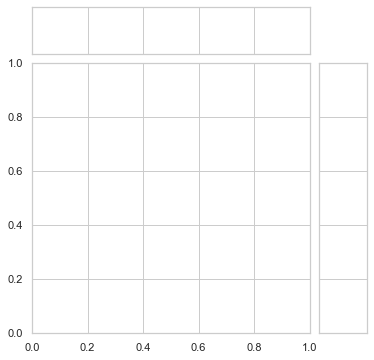

In [175]:
JPlot('Age','CreditScore')

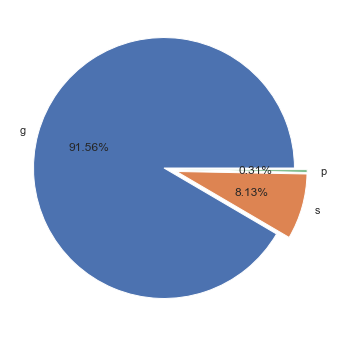

In [177]:
Pie('Citizen')

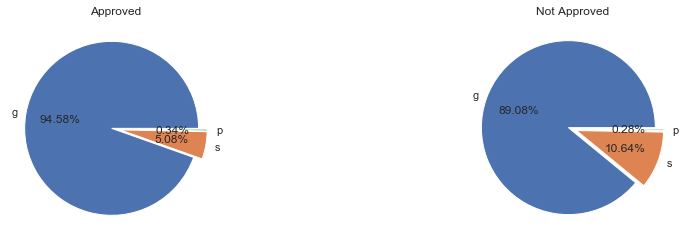

In [178]:
SelectedApprovedPie('Citizen')

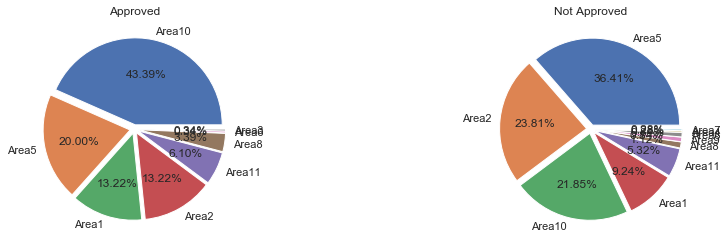

In [180]:
SelectedApprovedPie('ZipArea')

In [182]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved',
       'AgeLevel', 'DebtLevel', 'YearsEmployedLevel', 'CreditScoreLevel',
       'IncomeLevel', 'ZipArea'],
      dtype='object')

In [185]:
EncodedFeatures = ['Gender','Married','BankCustomer','EducationLevel',
                   'Ethnicity','PriorDefault','Employed','DriversLicense',
                   'Citizen','ZipCode','Approved','AgeLevel','DebtLevel','YearsEmployedLevel',
                   'CreditScoreLevel','IncomeLevel','ZipArea']
df[EncodedFeatures]

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,Approved,AgeLevel,DebtLevel,YearsEmployedLevel,CreditScoreLevel,IncomeLevel,ZipArea
0,b,u,g,i,v,f,f,t,g,00140,-,Teen,Poor Debt,Low Experience,Poor Credit,Poor Income,Area5
1,b,u,g,i,v,f,f,t,g,00221,-,Adult,Poor Debt,Low Experience,Poor Credit,Poor Income,Area2
2,b,u,g,k,v,f,f,t,g,00100,-,Adult,Medium Debt,Medium Experience,Poor Credit,Good Income,Area5
3,b,y,p,c,bb,t,f,t,g,00164,-,Adult,Poor Debt,Low Experience,Poor Credit,Medium Income,Area5
4,b,y,p,k,v,f,f,f,g,00140,-,YoungMan,Poor Debt,Low Experience,Poor Credit,Poor Income,Area5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,b,y,p,w,v,f,f,f,s,00200,-,Adult,Poor Debt,Medium Experience,Poor Credit,Poor Income,Area2
648,b,y,p,c,v,f,f,f,g,00160,-,Old,Medium Debt,Medium Experience,Poor Credit,Poor Income,Area5
649,b,y,p,d,v,t,f,t,s,00100,+,Adult,Medium Debt,Good Experience,Poor Credit,Poor Income,Area5
650,b,u,g,i,bb,f,f,t,g,00640,-,Adult,Poor Debt,Low Experience,Poor Credit,Good Income,Area9


In [186]:
from sklearn.preprocessing import LabelEncoder

def ApplyEncoder(OriginalColumn) : 
    global df
    Encoder = LabelEncoder()
    Encoder.fit(df[OriginalColumn])
    return Encoder.transform(df[OriginalColumn])

In [189]:
for col in EncodedFeatures : 
    df[f'Enc_{col}'] = ApplyEncoder(col)
df.head() 

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,AgeLevel,DebtLevel,YearsEmployedLevel,CreditScoreLevel,IncomeLevel,ZipArea,Enc_Gender,Enc_Married,Enc_BankCustomer,Enc_EducationLevel,Enc_Ethnicity,Enc_PriorDefault,Enc_Employed,Enc_DriversLicense,Enc_Citizen,Enc_ZipCode,Enc_Approved,Enc_AgeLevel,Enc_DebtLevel,Enc_YearsEmployedLevel,Enc_CreditScoreLevel,Enc_IncomeLevel,Enc_ZipArea
0,b,17.08,3.29,u,g,i,v,0.335,f,f,0,t,g,00140,2,-,Teen,Poor Debt,Low Experience,Poor Credit,Poor Income,Area5,1,1,0,6,7,0,0,1,0,44,1,2,2,1,2,2,6
1,b,36.67,2.00,u,g,i,v,0.250,f,f,0,t,g,00221,0,-,Adult,Poor Debt,Low Experience,Poor Credit,Poor Income,Area2,1,1,0,6,7,0,0,1,0,75,1,0,2,1,2,2,3
2,b,22.08,11.46,u,g,k,v,1.585,f,f,0,t,g,00100,1212,-,Adult,Medium Debt,Medium Experience,Poor Credit,Good Income,Area5,1,1,0,8,7,0,0,1,0,31,1,0,1,2,2,0,6
3,b,37.50,1.75,y,p,c,bb,0.250,t,f,0,t,g,00164,400,-,Adult,Poor Debt,Low Experience,Poor Credit,Medium Income,Area5,1,2,2,1,0,1,0,1,0,54,1,0,2,1,2,1,6
4,b,20.00,1.25,y,p,k,v,0.125,f,f,0,f,g,00140,4,-,YoungMan,Poor Debt,Low Experience,Poor Credit,Poor Income,Area5,1,2,2,8,7,0,0,0,0,44,1,3,2,1,2,2,6


In [190]:
df[['Approved','Enc_Approved']]

,Approved,Enc_Approved
0,-,1
1,-,1
2,-,1
3,-,1
4,-,1
...,...,...
647,-,1
648,-,1
649,+,0
650,-,1


In [193]:
X = df[['Age','Debt','YearsEmployed', 'CreditScore','Income',
          'Enc_Gender', 'Enc_Married', 'Enc_BankCustomer', 'Enc_EducationLevel',
          'Enc_Ethnicity', 'Enc_PriorDefault', 'Enc_Employed','Enc_DriversLicense',
          'Enc_Citizen', 'Enc_ZipCode', 'Enc_AgeLevel', 'Enc_DebtLevel', 'Enc_YearsEmployedLevel',
          'Enc_CreditScoreLevel', 'Enc_IncomeLevel','Enc_ZipArea']]
y = df['Enc_Approved']

In [195]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25 , random_state = 44 , shuffle = True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((489, 21), (163, 21), (489,), (163,))

In [196]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

In [197]:
GaussianNBModel = GaussianNB()
MultinomialNBModel = MultinomialNB(alpha=1.0)
BernoulliNBModel = BernoulliNB(alpha=1.0,binarize=1)
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
SGDClassifierModel = SGDClassifier(penalty='l2',loss='squared_loss',learning_rate='optimal',random_state=33)
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=300,max_depth=7,random_state=33) 
GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33) 
QDAModel = QuadraticDiscriminantAnalysis(tol=0.0001)
SVCModel = SVC(kernel= 'rbf',max_iter=100,C=1.0,gamma='auto')
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33)
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform',algorithm='auto') 

Models = [GaussianNBModel,KNNClassifierModel,MultinomialNBModel,
          BernoulliNBModel,LogisticRegressionModel,RandomForestClassifierModel,
          GBCModel,SGDClassifierModel,QDAModel,SVCModel,DecisionTreeClassifierModel]

In [198]:
ModelsScore = {}
for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    ClassificationReport = classification_report(y_test,y_pred)
    print('Classification Report is : \n', ClassificationReport )
    print(f'Precision value is  : {ClassificationReport.split()[19]}')
    print(f'Recall value is  : {ClassificationReport.split()[20]}')
    print(f'F1 Score value is  : {ClassificationReport.split()[21]}')
    ModelsScore[str(Model).split("(")[0]] = [ClassificationReport.split()[19],
                                             ClassificationReport.split()[20],ClassificationReport.split()[21]]
    print('=================================================')   

for Model GaussianNB
Train Score is : 0.803680981595092
Test Score is : 0.7791411042944786
Classification Report is : 
               precision    recall  f1-score   support

           0       0.85      0.62      0.72        74
           1       0.74      0.91      0.82        89

    accuracy                           0.78       163
   macro avg       0.80      0.77      0.77       163
weighted avg       0.79      0.78      0.77       163

Precision value is  : 0.80
Recall value is  : 0.77
F1 Score value is  : 0.77
for Model KNeighborsClassifier
Train Score is : 0.7811860940695297
Test Score is : 0.6871165644171779
Classification Report is : 
               precision    recall  f1-score   support

           0       0.69      0.55      0.62        74
           1       0.68      0.80      0.74        89

    accuracy                           0.69       163
   macro avg       0.69      0.68      0.68       163
weighted avg       0.69      0.69      0.68       163

Precision value is

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Train Score is : 0.967280163599182
Test Score is : 0.8220858895705522
Classification Report is : 
               precision    recall  f1-score   support

           0       0.81      0.80      0.80        74
           1       0.83      0.84      0.84        89

    accuracy                           0.82       163
   macro avg       0.82      0.82      0.82       163
weighted avg       0.82      0.82      0.82       163

Precision value is  : 0.82
Recall value is  : 0.82
F1 Score value is  : 0.82
for Model GradientBoostingClassifier
Train Score is : 0.983640081799591
Test Score is : 0.8282208588957055
Classification Report is : 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        74
           1       0.85      0.83      0.84        89

    accuracy                           0.83       163
   macro avg       0.83      0.83      0.83       163
weighted avg       0.83      0.83      0.83       163

Precision value is  : 0.83
Recall 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

Train Score is : 0.8813905930470347
Test Score is : 0.8220858895705522
Classification Report is : 
               precision    recall  f1-score   support

           0       0.75      0.92      0.82        74
           1       0.92      0.74      0.82        89

    accuracy                           0.82       163
   macro avg       0.83      0.83      0.82       163
weighted avg       0.84      0.82      0.82       163

Precision value is  : 0.83
Recall value is  : 0.83
F1 Score value is  : 0.82


In [199]:
ModelsScore

{'GaussianNB': ['0.80', '0.77', '0.77'],
 'KNeighborsClassifier': ['0.69', '0.68', '0.68'],
 'MultinomialNB': ['0.78', '0.67', '0.66'],
 'BernoulliNB': ['0.78', '0.75', '0.76'],
 'LogisticRegression': ['0.60', '0.60', '0.60'],
 'RandomForestClassifier': ['0.82', '0.82', '0.82'],
 'GradientBoostingClassifier': ['0.83', '0.83', '0.83'],
 'SGDClassifier': ['0.27', '0.50', '0.35'],
 'QuadraticDiscriminantAnalysis': ['0.64', '0.64', '0.64'],
 'SVC': ['0.59', '0.59', '0.59'],
 'DecisionTreeClassifier': ['0.83', '0.83', '0.82']}

In [200]:
Model = RandomForestClassifierModel
Model.fit(X_train, y_train)
print(f'Train Score is : {Model.score(X_train,y_train)}')
print(f'Test Score is : {Model.score(X_test,y_test)}')
y_pred = Model.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )
print(f'Precision value is  : {ClassificationReport.split()[19]}')
print(f'Recall value is  : {ClassificationReport.split()[20]}')
print(f'F1 Score value is  : {ClassificationReport.split()[21]}')

Train Score is : 0.967280163599182
Test Score is : 0.8220858895705522
Classification Report is : 
               precision    recall  f1-score   support

           0       0.81      0.80      0.80        74
           1       0.83      0.84      0.84        89

    accuracy                           0.82       163
   macro avg       0.82      0.82      0.82       163
weighted avg       0.82      0.82      0.82       163

Precision value is  : 0.82
Recall value is  : 0.82
F1 Score value is  : 0.82


In [201]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1])

In [202]:
list(y_test)

[1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1]

In [203]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)


Confusion Matrix is : 
 [[59 15]
 [14 75]]


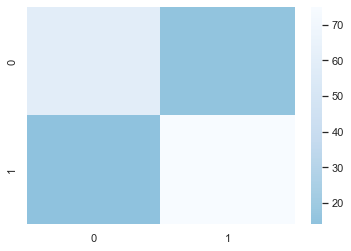

In [204]:
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()

In [205]:
AllPredict = Model.predict(X)
ClassificationReport = classification_report(y,AllPredict)
print('Classification Report is : \n', ClassificationReport )
print(f'Precision value is  : {ClassificationReport.split()[19]}')
print(f'Recall value is  : {ClassificationReport.split()[20]}')
print(f'F1 Score value is  : {ClassificationReport.split()[21]}')

Classification Report is : 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       295
           1       0.93      0.95      0.94       357

    accuracy                           0.93       652
   macro avg       0.93      0.93      0.93       652
weighted avg       0.93      0.93      0.93       652

Precision value is  : 0.93
Recall value is  : 0.93
F1 Score value is  : 0.93


In [206]:
AllPredict

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [207]:
df['Predicted Value'] = AllPredict
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,AgeLevel,DebtLevel,YearsEmployedLevel,CreditScoreLevel,IncomeLevel,ZipArea,Enc_Gender,Enc_Married,Enc_BankCustomer,Enc_EducationLevel,Enc_Ethnicity,Enc_PriorDefault,Enc_Employed,Enc_DriversLicense,Enc_Citizen,Enc_ZipCode,Enc_Approved,Enc_AgeLevel,Enc_DebtLevel,Enc_YearsEmployedLevel,Enc_CreditScoreLevel,Enc_IncomeLevel,Enc_ZipArea,Predicted Value
0,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-,Teen,Poor Debt,Low Experience,Poor Credit,Poor Income,Area5,1,1,0,6,7,0,0,1,0,44,1,2,2,1,2,2,6,1
1,b,36.67,2.000,u,g,i,v,0.250,f,f,0,t,g,00221,0,-,Adult,Poor Debt,Low Experience,Poor Credit,Poor Income,Area2,1,1,0,6,7,0,0,1,0,75,1,0,2,1,2,2,3,1
2,b,22.08,11.460,u,g,k,v,1.585,f,f,0,t,g,00100,1212,-,Adult,Medium Debt,Medium Experience,Poor Credit,Good Income,Area5,1,1,0,8,7,0,0,1,0,31,1,0,1,2,2,0,6,1
3,b,37.50,1.750,y,p,c,bb,0.250,t,f,0,t,g,00164,400,-,Adult,Poor Debt,Low Experience,Poor Credit,Medium Income,Area5,1,2,2,1,0,1,0,1,0,54,1,0,2,1,2,1,6,0
4,b,20.00,1.250,y,p,k,v,0.125,f,f,0,f,g,00140,4,-,YoungMan,Poor Debt,Low Experience,Poor Credit,Poor Income,Area5,1,2,2,8,7,0,0,0,0,44,1,3,2,1,2,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,b,34.83,2.500,y,p,w,v,3.000,f,f,0,f,s,00200,0,-,Adult,Poor Debt,Medium Experience,Poor Credit,Poor Income,Area2,1,2,2,12,7,0,0,0,2,67,1,0,2,2,2,2,3,1
648,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,00160,2,-,Old,Medium Debt,Medium Experience,Poor Credit,Poor Income,Area5,1,2,2,1,7,0,0,0,0,52,1,1,1,2,2,2,6,1
649,b,24.33,6.625,y,p,d,v,5.500,t,f,0,t,s,00100,0,+,Adult,Medium Debt,Good Experience,Poor Credit,Poor Income,Area5,1,2,2,3,7,1,0,1,2,31,0,0,1,0,2,2,6,0
650,b,26.92,2.250,u,g,i,bb,0.500,f,f,0,t,g,00640,4000,-,Adult,Poor Debt,Low Experience,Poor Credit,Good Income,Area9,1,1,0,6,0,0,0,1,0,155,1,0,2,1,2,0,10,1


In [209]:
df[['Enc_Approved','Predicted Value']]

,Enc_Approved,Predicted Value
0,1,1
1,1,1
2,1,1
3,1,0
4,1,1
...,...,...
647,1,1
648,1,1
649,0,0
650,1,1


In [212]:
ValuesDict = {0:'Approved',1:'Not Approved'}
WrongIndices = []
WrongCounter = 0
Index = -1
for Actual,Predicted in zip(df['Enc_Approved'].tolist(),df['Predicted Value'].tolist()) : 
    Index+=1
    if Actual != Predicted : 
        WrongCounter+=1
        WrongIndices.append(Index)
        print(f'Wrong Prediction at Index {Index} predicted as {ValuesDict[Predicted]} while it should be {ValuesDict[Actual]}')
print(f'\n\n Total Wrong Predictions is {WrongCounter} out of total {df.shape[0]} with percentage {np.round(100*(df.shape[0]-WrongCounter)/df.shape[0],2)}%')        

Wrong Prediction at Index 3 predicted as Approved while it should be Not Approved
Wrong Prediction at Index 10 predicted as Approved while it should be Not Approved
Wrong Prediction at Index 35 predicted as Approved while it should be Not Approved
Wrong Prediction at Index 46 predicted as Not Approved while it should be Approved
Wrong Prediction at Index 53 predicted as Not Approved while it should be Approved
Wrong Prediction at Index 61 predicted as Approved while it should be Not Approved
Wrong Prediction at Index 64 predicted as Approved while it should be Not Approved
Wrong Prediction at Index 76 predicted as Not Approved while it should be Approved
Wrong Prediction at Index 79 predicted as Not Approved while it should be Approved
Wrong Prediction at Index 83 predicted as Approved while it should be Not Approved
Wrong Prediction at Index 93 predicted as Approved while it should be Not Approved
Wrong Prediction at Index 113 predicted as Not Approved while it should be Approved
Wron